In [1]:
# Standard import for pandas, numpy and matplot
import pandas as pd
import matplotlib
import re

In [2]:
# Read in the csv file and display some of the basic info
survey=pd.read_csv("GIS_Official_Survey.csv",parse_dates=['Timestamp'])
print "Data types in the file:"
print survey.dtypes

Data types in the file:
Timestamp                                                                                                          datetime64[ns]
Gender                                                                                                                     object
What country do you live in?                                                                                               object
If United States, what state?                                                                                              object
What is your race and/or ethnicity?                                                                                        object
What is your age?                                                                                                          object
What is the highest level of education you have completed?                                                                 object
Where did you obtain your latest degree?                          

In [3]:
%matplotlib inline

#Set matplotlib default styles:
font = {'family' : 'Sans Serif',
        'size'   : 14}

matplotlib.rc('font', **font)
matplotlib.rcParams['figure.figsize'] = (10, 6)

#Set Pandas display options:
pd.set_option('display.height', 500)
pd.set_option('display.max_rows', 500)

#Set Pandas warning options:
pd.options.mode.chained_assignment = None  # default='warn'

height has been deprecated.



Gender counts:
Gender
Female                64
Male                 337
Prefer not to say      5
dtype: int64

Gender percentages:
Gender
Female               15.763547
Male                 83.004926
Prefer not to say     1.231527
dtype: float64


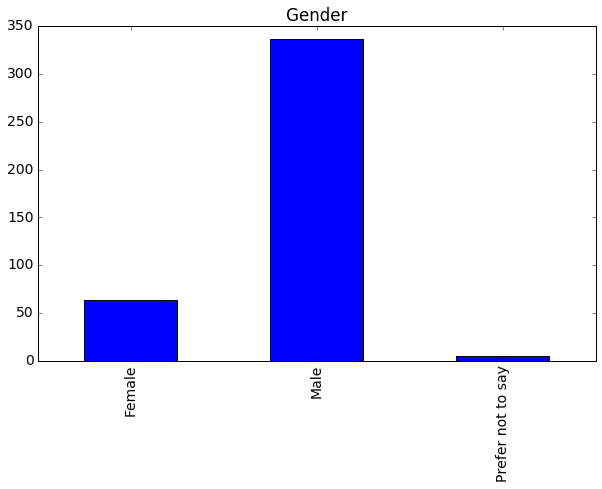

In [4]:
print "Gender counts:"
var = survey.groupby('Gender').size()
print var

print "\nGender percentages:"
var2 = survey.groupby('Gender').size() * 100 / len(survey)
print var2

my_plot = var.plot(kind='bar', title="Gender")
my_plot.set_xlabel("")
my_plot.set_ylabel("")
my_plot.patch.set_facecolor('None') #or ax.patch.set_visible(False).

Country counts:
What country do you live in?
United States          277
Canada                  41
United Kingdom          18
Australia               12
Germany                 12
Ireland                  5
France                   4
Sweden                   4
Netherlands              4
New Zealand              3
Norway                   2
Finland                  2
Austria                  2
Spain                    2
Switzerland              2
Denmark                  1
Brazil                   1
Chile                    1
Croatia                  1
Cyprus                   1
Chad                     1
Vietnam                  1
India                    1
Indonesia                1
Israel                   1
Philippines              1
Poland                   1
Serbia                   1
South Africa             1
Trinidad and Tobago      1
American Samoa           1
dtype: int64

Country percentages:
What country do you live in?
United States          68.226601
Canada               

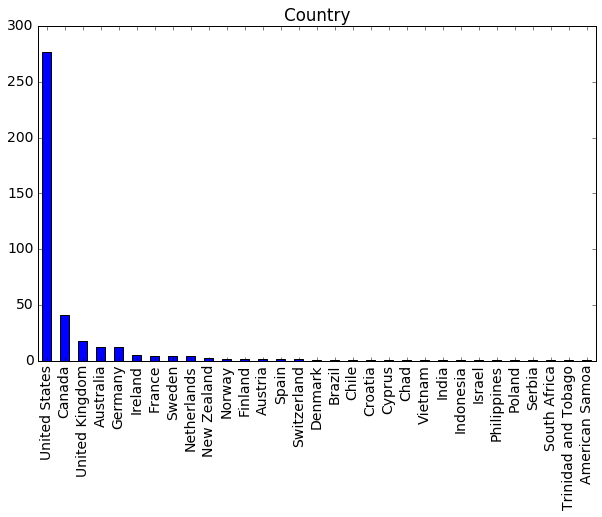

In [5]:
print "Country counts:"
var = survey.groupby('What country do you live in?').size().sort_values(ascending=False)
print var

print "\nCountry percentages:"
var2 = survey.groupby('What country do you live in?').size() * 100 / len(survey)
print var2.sort_values(ascending=False)

my_plot = var.plot(kind='bar', title="Country")
my_plot.set_xlabel("")
my_plot.set_ylabel("")
my_plot.patch.set_facecolor('None') #or ax.patch.set_visible(False).


US vs NonUS
What country do you live in?
United States    277
Other            129
dtype: int64

Country percentages:
What country do you live in?
United States    68.226601
Other            31.773399
dtype: float64


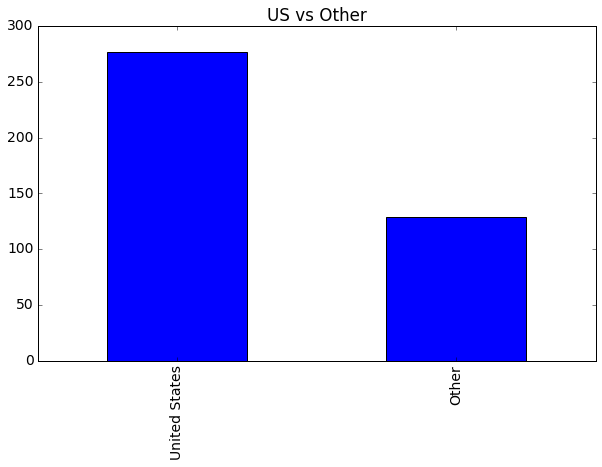

In [6]:
print "\nUS vs NonUS"

# Grab all countries apart from the US. So second onwards.
not_US = survey.groupby('What country do you live in?').size().sort_values(ascending=False).index[1:]
survey_new  = survey.replace(not_US, 'Other')
survey_new.groupby('What country do you live in?').size()

var = survey_new.groupby('What country do you live in?').size().sort_values(ascending=False)
print var

print "\nCountry percentages:"
var2 = survey_new.groupby('What country do you live in?').size() * 100 / len(survey)
print var2.sort_values(ascending=False)

my_plot = var.plot(kind='bar', title="US vs Other")
my_plot.set_xlabel("")
my_plot.set_ylabel("")
my_plot.patch.set_facecolor('None') #or ax.patch.set_visible(False).

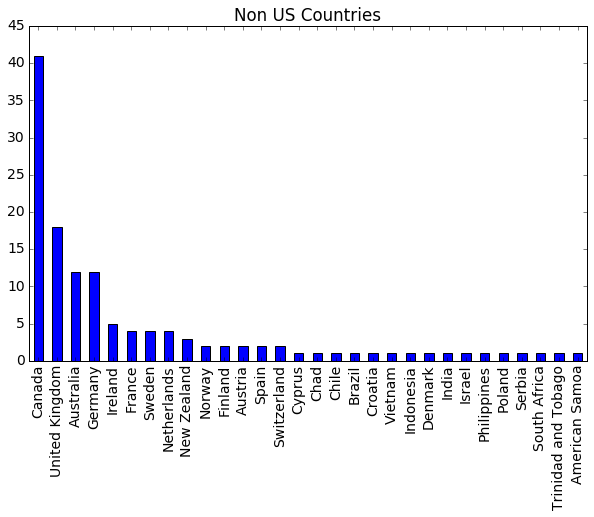

In [7]:
#Non us country plot
mask = survey['What country do you live in?'].isin(["United States"])
non_us_survey = survey[~mask]
var3 = non_us_survey.groupby('What country do you live in?').size().sort_values(ascending=False)

my_plot2 = var3.plot(kind='bar', title="Non US Countries")
my_plot2.set_xlabel("")
my_plot2.set_ylabel("")
my_plot2.patch.set_facecolor('None') #or ax.patch.set_visible(False).

State counts:
If United States, what state?
Texas             34
California        29
Florida           16
Virginia          13
Illinois          12
Maryland          12
Ohio              11
Minnesota         11
Colorado          10
Washington         9
New York           8
Pennsylvania       7
North Carolina     6
Tennessee          6
Wisconsin          5
South Carolina     5
Georgia            5
Michigan           5
Missouri           5
Oregon             5
Arkansas           4
New Jersey         4
Utah               4
Oklahoma           4
Arizona            3
Massachusetts      3
Washington D.C     3
Iowa               3
Kentucky           3
Alaska             2
Wyoming            2
Maine              2
New Hampshire      2
West Virginia      2
Alabama            2
Indiana            1
Kansas             1
Idaho              1
Louisiana          1
Connecticut        1
Montana            1
Nevada             1
North Dakota       1
dtype: int64

State percentages:
If United States, wh

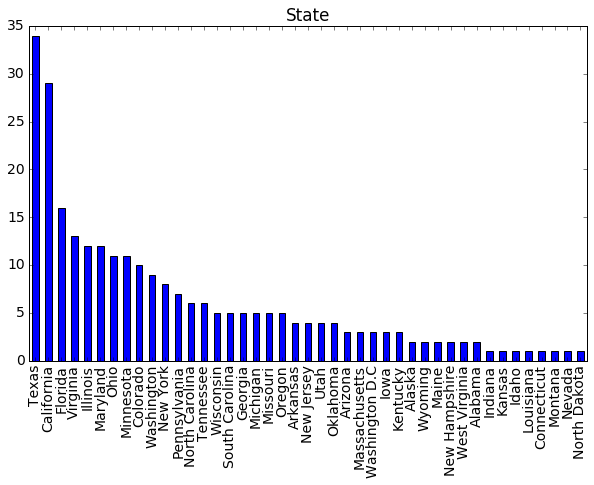

In [8]:
#US State
mask = survey['What country do you live in?'].isin(["United States"])
us_survey = survey[mask]

print "State counts:"
var = us_survey.groupby('If United States, what state?').size().sort_values(ascending=False)
print var

print "\nState percentages:"
var2 = us_survey.groupby('If United States, what state?').size() * 100 / len(us_survey)
print var2.sort_values(ascending=False)

my_plot = var.plot(kind='bar', title="State")
my_plot.set_xlabel("")
my_plot.set_ylabel("")
my_plot.patch.set_facecolor('None') #or ax.patch.set_visible(False).

In [9]:
print "Ethnicity counts:"

eth_survey = survey
# Clean data a bit

# Remove case issues
eth_survey['What is your race and/or ethnicity?'] = eth_survey['What is your race and/or ethnicity?'].str.title()
# Remove non letter/space
eth_survey['What is your race and/or ethnicity?'] = eth_survey['What is your race and/or ethnicity?'].replace(r'[^a-zA-Z ]+', ' ', regex=True)
# Strip extra space at start/end
eth_survey['What is your race and/or ethnicity?'] = eth_survey['What is your race and/or ethnicity?'].map(lambda x: str(x).strip())
# Remove double spaces
eth_survey['What is your race and/or ethnicity?'] = eth_survey['What is your race and/or ethnicity?'].replace(r' +',' ', regex=True)


var = eth_survey.groupby('What is your race and/or ethnicity?').size().sort_values(ascending=False)
print var

print "\nEthnicity percentages:"
var2 = eth_survey.groupby('What is your race and/or ethnicity?').size() * 100 / len(survey)
print var2.sort_values(ascending=False)

Ethnicity counts:
What is your race and/or ethnicity?
White                                       175
nan                                          73
Caucasian                                    71
Hispanic                                     10
White British                                 9
Asian                                         7
Mixed                                         4
British                                       3
European                                      3
Human                                         3
Native American                               2
Caucasion                                     2
European White                                2
Hispanic White                                2
Indian                                        2
African American                              2
Swedish                                       1
Pedestrian                                    1
White European                                1
East Asian                        

Age counts:
What is your age?
17 or younger      2
18 to 24          99
25 to 34         232
35 to 44          55
45 to 54          15
55 to 64           3
dtype: int64

Age percentages:
What is your age?
17 or younger     0.492611
18 to 24         24.384236
25 to 34         57.142857
35 to 44         13.546798
45 to 54          3.694581
55 to 64          0.738916
dtype: float64


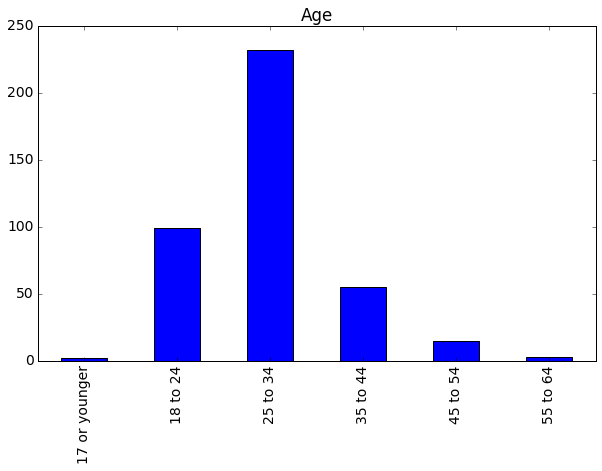

In [10]:
print "Age counts:"
var = survey.groupby('What is your age?').size()
print var

print "\nAge percentages:"
var2 = survey.groupby('What is your age?').size() * 100 / len(survey)
print var2

my_plot = var.plot(kind='bar', title="Age")
my_plot.set_xlabel("")
my_plot.set_ylabel("")
my_plot.patch.set_facecolor('None') #or ax.patch.set_visible(False).

Education counts:
What is the highest level of education you have completed?
Bachelor's (Undergraduate) Degree                           217
Master's Degree                                             131
High School or equivalent                                    24
2-Year Degree (Technical, Certificate, Associate's, etc)     13
Doctorate degree                                              7
Less than High School                                         2
Graduate certificate                                          1
Bachelors + graduate certificate                              1
Grad Certificate                                              1
Graduate Certificate                                          1
post graduate diploma                                         1
Graduate certificate                                          1
Studying right now (Bachelor)                                 1
Have my associates, will have a bachelors in 9 months         1
Post baccalaureate certific

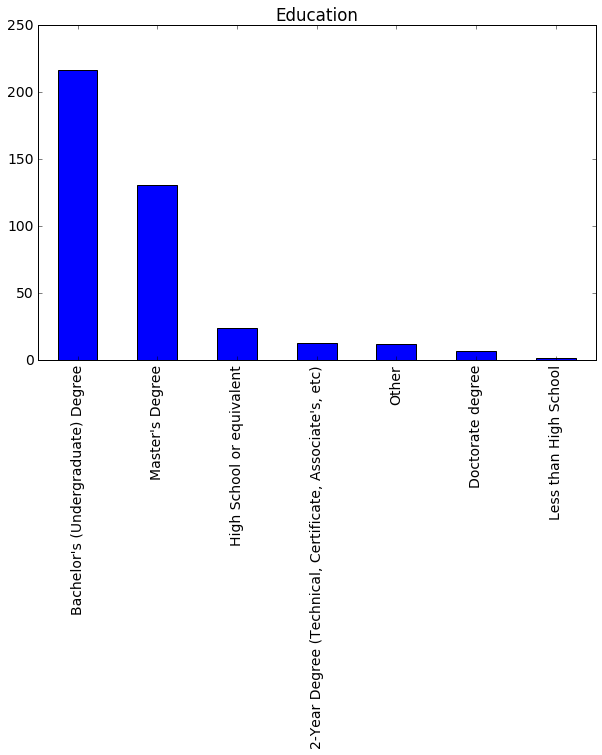

In [11]:
print "Education counts:"
var = survey.groupby('What is the highest level of education you have completed?').size().sort_values(ascending=False)
print var

# Create Other Category
other_edu = survey.groupby('What is the highest level of education you have completed?').size().sort_values(ascending=False).index[6:]
survey_new  = survey.replace(other_edu, 'Other')
survey_new.groupby('What is the highest level of education you have completed?').size()

print "Education counts:"
var = survey_new.groupby('What is the highest level of education you have completed?').size().sort_values(ascending=False)
print var

print "\nEducation percentages:"
var2 = survey_new.groupby('What is the highest level of education you have completed?').size() * 100 / len(survey)
print var2.sort_values(ascending=False)

my_plot = var.plot(kind='bar', title="Education")
my_plot.set_xlabel("")
my_plot.set_ylabel("")
my_plot.patch.set_facecolor('None') #or ax.patch.set_visible(False).

In [12]:
print "School counts:"

school_survey = survey
# Clean data a bit
# Remove case issues
school_survey['Where did you obtain your latest degree?'] = school_survey['Where did you obtain your latest degree?'].str.title()

# Remove '.' and other puctuation
school_survey['Where did you obtain your latest degree?'] = school_survey['Where did you obtain your latest degree?'].replace(r'\.','', regex=True)
school_survey['Where did you obtain your latest degree?'] = school_survey['Where did you obtain your latest degree?'].replace(r',|-|:',' ', regex=True)

# Remove University abbreviations
school_survey['Where did you obtain your latest degree?'] = school_survey['Where did you obtain your latest degree?'].replace(r'Unive\b|Univ\b|Uni\b|U\b','University', regex=True)

# Remove numbers
school_survey['Where did you obtain your latest degree?'] = school_survey['Where did you obtain your latest degree?'].replace(r'[\d]+', '', regex=True)

# Remove spaces
school_survey['Where did you obtain your latest degree?'] = school_survey['Where did you obtain your latest degree?'].map(lambda x: str(x).strip())
school_survey['Where did you obtain your latest degree?'] = school_survey['Where did you obtain your latest degree?'].replace(r' +',' ', regex=True)

var = school_survey.groupby('Where did you obtain your latest degree?').size().sort_values(ascending=False)
print var

School counts:
Where did you obtain your latest degree?
nan                                                    91
                                                       17
University Of Arizona                                   4
Texas A&M University                                    4
Penn State                                              4
University Of North Texas                               4
University Of Washington                                3
University Of Denver                                    3
University Of Utah                                      3
University Of Florida                                   3
University Of Tennessee                                 3
University Of Minnesota                                 3
University Of North Dakota                              3
Umbc                                                    2
Oklahoma State University                               2
University Of Texas At Dallas                           2
University Of Ca

Counts:
If you obtained more than an Bachelor's (Undergraduate) Degree (like a Masters or PhD), would you recommend it?
Yes                                                                    69
Maybe                                                                  56
No                                                                      9
It was the only option for me since there was no undergrad program      1
If you like academia or research, yes                                   1
dtype: int64

Percentages:
If you obtained more than an Bachelor's (Undergraduate) Degree (like a Masters or PhD), would you recommend it?
Yes                                                                    45.695364
Maybe                                                                  37.086093
No                                                                      5.960265
It was the only option for me since there was no undergrad program      0.662252
If you like academia or research, yes          

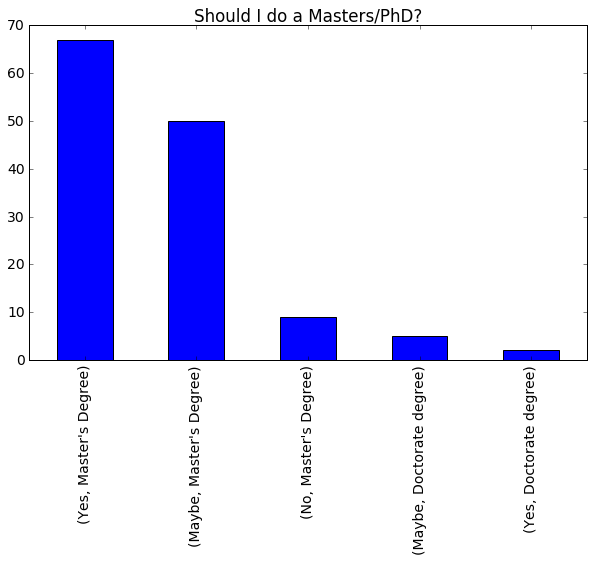

In [13]:
# Should I do a Masters/PhD
mask = survey['What is the highest level of education you have completed?'].isin(["Master's Degree","2-Year Degree (Technical, Certificate, Associate's, etc)","Doctorate degree"])
higher_edu_survey = survey[mask]

print "Counts:"
var = higher_edu_survey.groupby("If you obtained more than an Bachelor's (Undergraduate) Degree (like a Masters or PhD), would you recommend it?").size().sort_values(ascending=False)
print var

print "\nPercentages:"
var2 = higher_edu_survey.groupby("If you obtained more than an Bachelor's (Undergraduate) Degree (like a Masters or PhD), would you recommend it?").size() * 100 / len(higher_edu_survey)
print var2.sort_values(ascending=False)

# Rename our colmun, who designed this survey!?!?!
higher_edu_survey2 = higher_edu_survey[["If you obtained more than an Bachelor's (Undergraduate) Degree (like a Masters or PhD), would you recommend it?", "What is the highest level of education you have completed?", "Where did you obtain your latest degree?"]]
higher_edu_survey2.columns = ['a', 'b', 'c']

print "\nMasters vs PhD:"
var3 = higher_edu_survey2.groupby(['a', 'b']).size().sort_values(ascending=False).nlargest(5)
print var3

my_plot = var3.plot(kind='bar', title="Should I do a Masters/PhD?")
my_plot.set_xlabel("")
my_plot.set_ylabel("")
my_plot.patch.set_facecolor('None') #or ax.patch.set_visible(False).

In [14]:
print "\nBy School?"

# Remove other other values.
not_y_n = higher_edu_survey2.groupby('a').size().sort_values(ascending=False).index[2:]
higher_edu_survey3  = higher_edu_survey2.replace(not_y_n, 'Maybe')

var4 = higher_edu_survey3.groupby(['c', 'a']).size()
print var4


By School?
c                                                 a    
                                                  Maybe     3
                                                  Yes       6
Australia                                         Maybe     1
Binghamton University                             Yes       1
Cal State Fullerton                               Maybe     1
California State University Long Beach            Yes       1
Ccsu                                              Yes       1
Central Washington University                     Maybe     1
Centre Of Geographic Sciences Nova Scotia Canada  Maybe     1
Csu Long Beach                                    Yes       1
Dayton Ohio                                       Yes       1
Delhi                                             Maybe     1
Eastern Michigan University                       Yes       1
Epfl Switzerland                                  Yes       1
Finland                                           Yes       1
Fl

Job status counts:
Job status
Mid level                                                                              194
Entry level                                                                             91
Student - University/College                                                            55
Mangement                                                                               25
Looking for work                                                                        14
Self employed (Entrepreneur, Freelancer, etc..)                                          6
Student - High School                                                                    2
Intern                                                                                   2
Internship                                                                               2
Co-op internship as university student                                                   1
Faculty                                                     

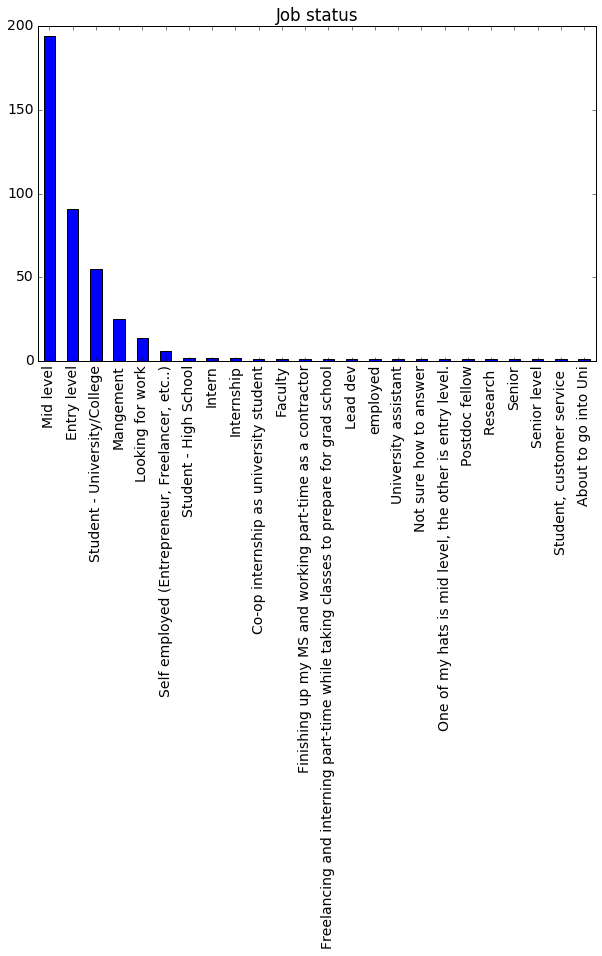

In [15]:
print "Job status counts:"
var = survey.groupby('Job status').size().sort_values(ascending=False)
print var

print "\nJob status percentages:"
var2 = survey.groupby('Job status').size() * 100 / len(survey)
print var2.sort_values(ascending=False)

my_plot = var.plot(kind='bar', title="Job status")
my_plot.set_xlabel("")
my_plot.set_ylabel("")
my_plot.patch.set_facecolor('None') #or ax.patch.set_visible(False).

Income level
Income counts:
Income level in US Dollars
Under 20000         62
20000 - 30000       31
30000 - 40000       48
40000 - 50000       71
50000 - 75000      130
75000 - 100000      44
100000 - 150000     18
150000 or more       2
dtype: int64

Income percentages:
Income level in US Dollars
Under 20000        15.270936
20000 - 30000       7.635468
30000 - 40000      11.822660
40000 - 50000      17.487685
50000 - 75000      32.019704
75000 - 100000     10.837438
100000 - 150000     4.433498
150000 or more      0.492611
dtype: float64


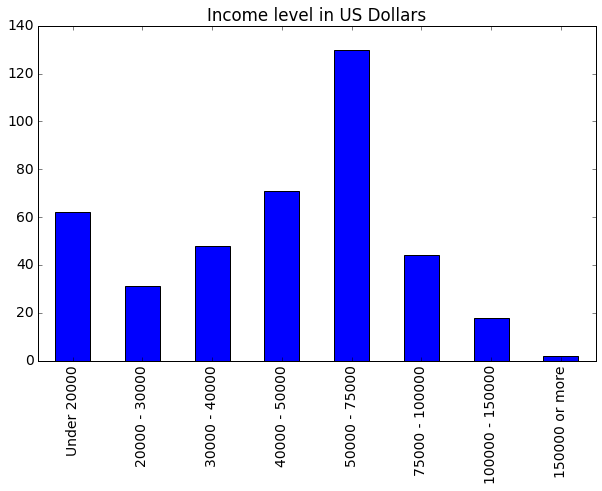

In [16]:
print "Income level"

survey=pd.read_csv("GIS_Official_Survey.csv",parse_dates=['Timestamp'])

income_survey = None
income_survey = survey

# $ Mess up matplotlib charts
income_survey['Income level in US Dollars'] = income_survey['Income level in US Dollars'].replace('\\$|,', '', regex=True)

income_survey['Income level in US Dollars'] = pd.Categorical(income_survey['Income level in US Dollars'], ["Under 20000","20000 - 30000","30000 - 40000","40000 - 50000","50000 - 75000","75000 - 100000","100000 - 150000","150000 or more"])

print "Income counts:"
var = income_survey.groupby('Income level in US Dollars').size()
print var

print "\nIncome percentages:"
var2 = income_survey.groupby('Income level in US Dollars').size() * 100 / len(survey)
print var2

my_plot = var.plot(kind='bar', title="Income level in US Dollars")
my_plot.set_xlabel("")
my_plot.set_ylabel("")
my_plot.patch.set_facecolor('None') #or ax.patch.set_visible(False).


How long have you been working?

Count:
How long have you been working?
Not employed.        30
Under 1 year         66
1-2 years            69
2-5 years           111
5-10 years           65
11-25 years          60
26 or more years      5
dtype: int64

Percentage:
How long have you been working?
Not employed.        7.389163
Under 1 year        16.256158
1-2 years           16.995074
2-5 years           27.339901
5-10 years          16.009852
11-25 years         14.778325
26 or more years     1.231527
dtype: float64


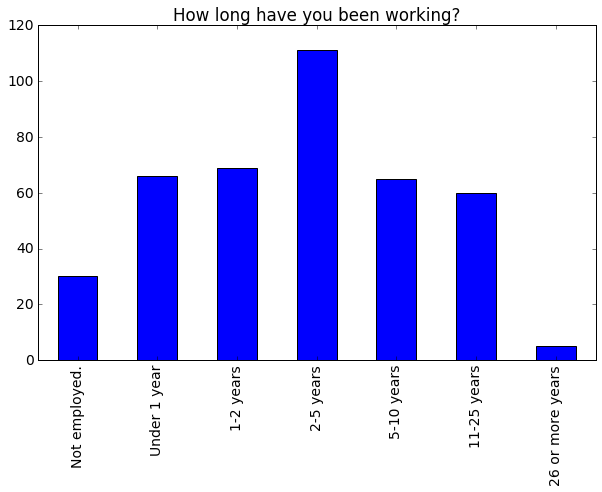

In [17]:
print "How long have you been working?"

work_len_survey = survey
work_len_survey['How long have you been working?'] = pd.Categorical(work_len_survey['How long have you been working?'], ["Not employed.","Under 1 year","1-2 years","2-5 years","5-10 years","11-25 years","26 or more years"])

print "\nCount:"
var = work_len_survey.groupby('How long have you been working?').size()
print var

print "\nPercentage:"
var2 = work_len_survey.groupby('How long have you been working?').size() * 100 / len(survey)
print var2

my_plot = var.plot(kind='bar', title="How long have you been working?")
my_plot.set_xlabel("")
my_plot.set_ylabel("")
my_plot.patch.set_facecolor('None') #or ax.patch.set_visible(False).

Work length vs salary:


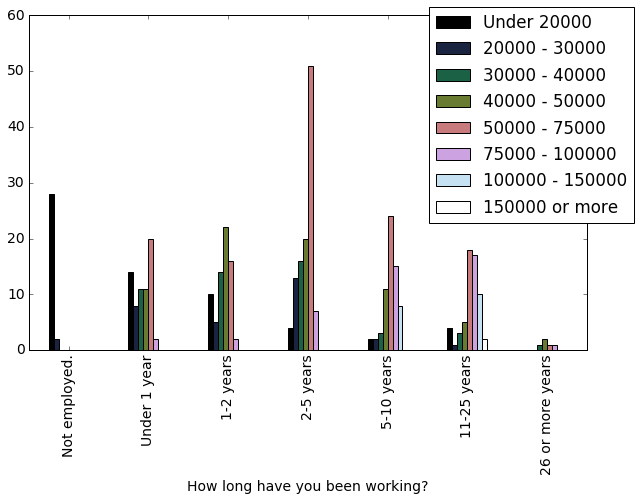

In [18]:
print "Work length vs salary:"

survey=pd.read_csv("GIS_Official_Survey.csv",parse_dates=['Timestamp'])
work_len_salary = survey[['Income level in US Dollars','How long have you been working?']]

work_len_salary['Income level in US Dollars'] = work_len_salary['Income level in US Dollars'].replace('\\$|,', '', regex=True)
work_len_salary['Income level in US Dollars'] = pd.Categorical(work_len_salary['Income level in US Dollars'], ["Under 20000","20000 - 30000","30000 - 40000","40000 - 50000","50000 - 75000","75000 - 100000","100000 - 150000","150000 or more"])
work_len_salary['How long have you been working?'] = pd.Categorical(work_len_salary['How long have you been working?'], ["Not employed.","Under 1 year","1-2 years","2-5 years","5-10 years","11-25 years","26 or more years"])

var_count = work_len_salary.groupby(['Income level in US Dollars', 'How long have you been working?']).size().reset_index(name='count')

var_count.pivot(index='How long have you been working?', columns='Income level in US Dollars' , values='count').plot(kind='bar', colormap='cubehelix').legend(bbox_to_anchor=(1.1, 1.05))

In [19]:
print "Job Title"

print "\nGIS in Job Title:"
print survey['If employed, what is your current job title?'].str.contains(r'GIS|gis').sum(), "out of", len(survey)

print "\nCount:"
var = survey.groupby('If employed, what is your current job title?').size().sort_values(ascending=False)
print var

Job Title

GIS in Job Title:
188 out of 406

Count:
If employed, what is your current job title?
GIS Analyst                                     37
GIS Technician                                  19
GIS Specialist                                  15
GIS Intern                                      10
GIS Coordinator                                  9
Senior GIS Analyst                               6
GIS Developer                                    6
GIS Manager                                      5
GIS Analyst                                      5
Cartographer                                     4
Software Engineer                                4
GIS Support Specialist                           3
GIS Specialist                                   3
GIS Technician                                   3
Technician                                       2
Researcher                                       2
GIS Specialist II                                2
Gis analyst                         

In [20]:
print "Industry"

print "\nWorks in/with Government:"
print survey['What industry do you work in?'].str.contains(r'Gov|gov').sum(), "out of", len(survey)


print "\nCount:"
var = survey.groupby('What industry do you work in?').size().sort_values(ascending=False)
print var


Industry

Works in/with Government:
80 out of 406

Count:
What industry do you work in?
Government                                          20
Local Government                                    16
Utilities                                           11
Consulting                                          10
GIS                                                 10
Engineering                                          8
Oil and Gas                                          7
Real Estate                                          6
Municipal Government                                 5
Utility                                              5
Transportation                                       5
Oil & Gas                                            4
Forestry                                             4
Local Government                                     3
Civil Engineering                                    3
Defense                                              3
Telecom                         

What desktop GIS software do you use?
Counts:
ArcGIS                                                                        341
QGIS                                                                          169
AutoCAD                                                                        72
GRASS                                                                          49
ENVI                                                                           28
ERDAS                                                                          28
MapInfo                                                                        20
Null                                                                            8
Idrisi                                                                          6
Global Mapper                                                                   5
R                                                                               5
Google Earth                                        

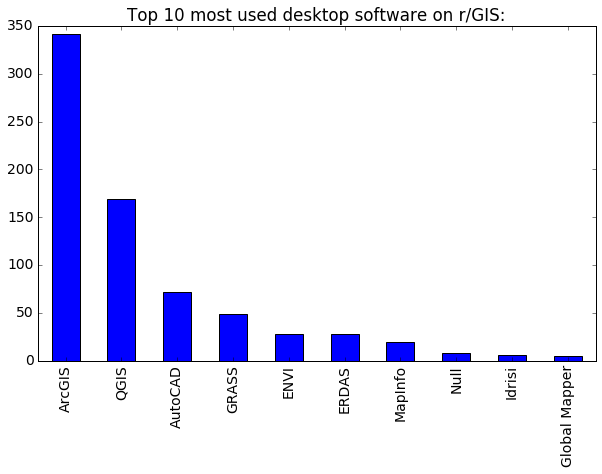

In [21]:
print "What desktop GIS software do you use?"

survey=pd.read_csv("GIS_Official_Survey.csv",parse_dates=['Timestamp'])
survey_software = survey

# Clean a bit
survey_software['What desktop GIS software do you use?'] = survey_software['What desktop GIS software do you use?'].fillna('Null')
survey_software['What desktop GIS software do you use?'] = survey_software['What desktop GIS software do you use?'].replace(',', ';', regex=True)
survey_software['What desktop GIS software do you use?'] = survey_software['What desktop GIS software do you use?'].replace('; | ;', ';', regex=True)

# Strip extra space at start/end
survey_software['What desktop GIS software do you use?'] = survey_software['What desktop GIS software do you use?'].map(lambda x: str(x).strip())

# Rename our colmun, who designed this survey!?!?!
survey_software = survey_software[["What desktop GIS software do you use?"]]
survey_software.columns = ['a']

# Seperate out semicolon seperated software lists
survey_software_list = survey_software.a.str.get_dummies(sep=";")

print "Counts:"
var = survey_software_list.sum().sort_values(ascending=False)
print var

print "\nPercentages:"
var2 = (survey_software_list.sum() / len(survey)) * 100
print var2.sort_values(ascending=False).nlargest(10)

var = var.nlargest(10)
my_plot = var.plot(kind='bar', title="Top 10 most used desktop software on r/GIS:")
my_plot.set_xlabel("")
my_plot.set_ylabel("")
my_plot.patch.set_facecolor('None') #or ax.patch.set_visible(False).

Other software:
Counts:
nan                                                                                                          159
Illustrator                                                                                                   38
FME                                                                                                           31
GDAL                                                                                                          25
Photoshop                                                                                                     22
Excel                                                                                                         21
R                                                                                                             16
Python                                                                                                        16
Inkscape                                                                

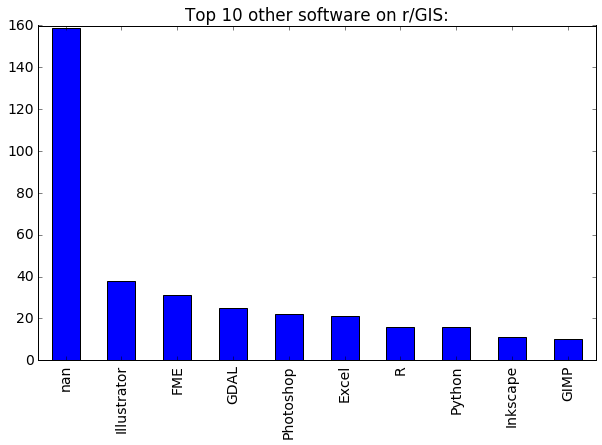

In [22]:
print "Other software:"

survey=pd.read_csv("GIS_Official_Survey.csv",parse_dates=['Timestamp'])
survey_software = survey

survey_software2 = survey

# Rename our colmun, who designed this survey!?!?!
survey_software2 = survey_software2[["Apart from GIS software, what other software do you use for your work? (ie Adobe Illustrator, GDAL, FME, etc)"]]
survey_software2.columns = ['a']

# Strip extra space at start/end
survey_software2['a'] = survey_software2['a'].replace('Adobe', ',', regex=True)
survey_software2['a'] = survey_software2['a'].map(lambda x: str(x).strip())
survey_software2['a'] = survey_software2['a'].replace(', |, ', ',', regex=True)

# Seperate out semicolon seperated software lists
survey_software_list2 = survey_software2.a.str.get_dummies(sep=",")

print "Counts:"
var = survey_software_list2.sum().sort_values(ascending=False)
print var

print "\nPercentages:"
var2 = (survey_software_list2.sum() / len(survey)) * 100
print var2.sort_values(ascending=False).nlargest(10)

var = var.nlargest(10)
my_plot = var.plot(kind='bar', title="Top 10 other software on r/GIS:")
my_plot.set_xlabel("")
my_plot.set_ylabel("")
my_plot.patch.set_facecolor('None') #or ax.patch.set_visible(False).

In [23]:
print "What are your hardware specs?"

print "\nI5 vs I7"
print "I5:",survey['What are your hardware specs?'].str.contains(r'i5|I5').sum()
print "I7:",survey['What are your hardware specs?'].str.contains(r'i7|I7').sum()

#print "\nCount:"
#var = survey.groupby('What are your hardware specs?').size().sort_values(ascending=False)
#print var

What are your hardware specs?

I5 vs I7
I5: 15
I7: 51


Programming?
Counts:
Python                                                        228
No                                                            148
SQL                                                           143
JavaScript                                                     91
Java                                                           21
C#                                                             16
R                                                              16
.NET                                                           16
Ruby                                                            2
C++                                                             2
PHP                                                             2
FME does it for me                                              1
TypeScript                                                      1
VBA                                                             1
If I knew programming it would definitely be an easier 

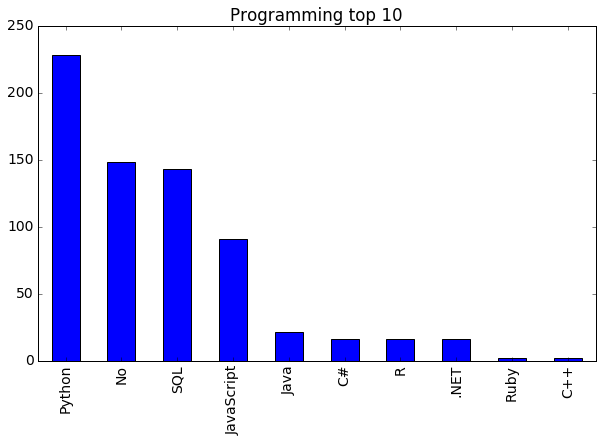

In [24]:
print "Programming?"

survey=pd.read_csv("GIS_Official_Survey.csv",parse_dates=['Timestamp'])
survey_prog = survey

# Clean a bit
#survey_software['What desktop GIS software do you use?'] = survey_software['What desktop GIS software do you use?'].fillna('Null')
#survey_software['What desktop GIS software do you use?'] = survey_software['What desktop GIS software do you use?'].replace(',', ';', regex=True)
#survey_software['What desktop GIS software do you use?'] = survey_software['What desktop GIS software do you use?'].replace('; | ;', ';', regex=True)

# Strip extra space at start/end
#survey_software['What desktop GIS software do you use?'] = survey_software['What desktop GIS software do you use?'].map(lambda x: str(x).strip())

# Rename our colmun, who designed this survey!?!?!
survey_prog = survey_prog[["Does your work require programming?"]]
survey_prog.columns = ['a']

# Seperate out semicolon seperated software lists
survey_prog_list = survey_prog.a.str.get_dummies(sep=";")

print "Counts:"
var = survey_prog_list.sum().sort_values(ascending=False)
print var

print "\nPercentages:"
var2 = (survey_prog_list.sum() / len(survey)) * 100
print var2.sort_values(ascending=False).nlargest(10)

var = var.nlargest(10)
my_plot = var.plot(kind='bar', title="Programming top 10")
my_plot.set_xlabel("")
my_plot.set_ylabel("")
my_plot.patch.set_facecolor('None') #or ax.patch.set_visible(False).

Database of choice?
Counts:
Database of choice?
File Geodatabase (ESRI)                               136
PostgreSQL                                             80
None (ShapeFiles baby)                                 63
SQL Server                                             58
Oracle                                                 28
Personal Geodatabase (ESRI)                            17
SQLite (SpatiaLite, GeoPackage)                         9
MySQL                                                   7
uh                                                      1
This question needs check boxes not radio buttons.      1
Smallworld VMDS                                         1
SQL CE                                                  1
MongoDB                                                 1
MS Access                                               1
JanusGraph                                              1
Cassandra                                               1
dtype: int64

Percentage

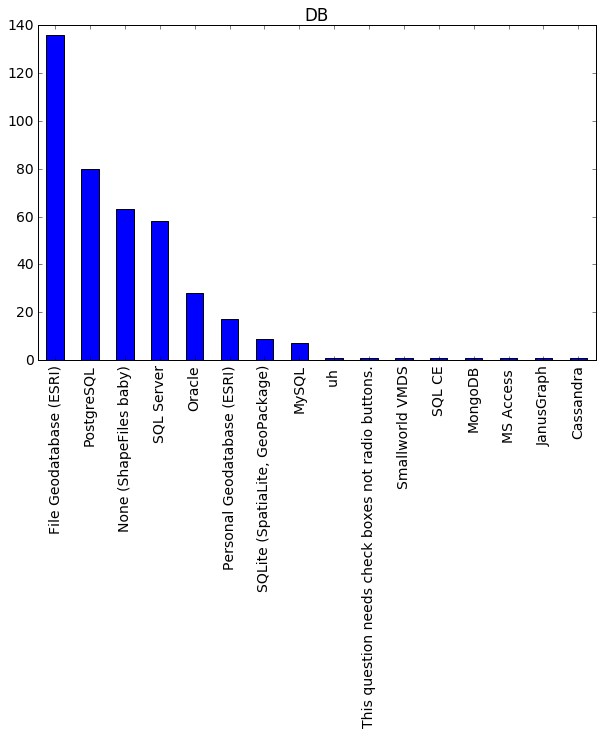

In [25]:
print "Database of choice?"

print "Counts:"
var = survey.groupby('Database of choice?').size().sort_values(ascending=False)
print var

print "\nPercentages:"
var2 = survey.groupby('Database of choice?').size() * 100 / len(survey)
print var2.sort_values(ascending=False)

my_plot = var.plot(kind='bar', title="DB")
my_plot.set_xlabel("")
my_plot.set_ylabel("")
my_plot.patch.set_facecolor('None') #or ax.patch.set_visible(False).

Certification?
Counts:
Do you have a professional certification?
No                                                376
GISP                                               19
Esri Web Developer Associate                        2
Working on one currently                            1
RPLS                                                1
Not yet                                             1
Not at the moment, I will when i get my degree      1
GIS Certificate                                     1
GIS Certificate                                     1
GIS Analyst Certificate                             1
Estimate cert                                       1
Certified Floodplain Manager (CFM)                  1
dtype: int64

Percentages:
Do you have a professional certification?
No                                                92.610837
GISP                                               4.679803
Esri Web Developer Associate                       0.492611
Working on one currently              

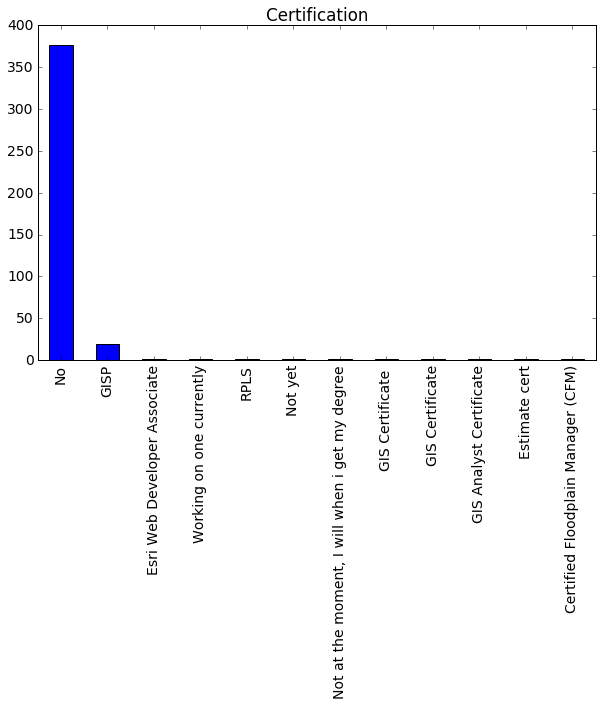

In [26]:
print "Certification?"

print "Counts:"
var = survey.groupby('Do you have a professional certification?').size().sort_values(ascending=False)
print var

print "\nPercentages:"
var2 = survey.groupby('Do you have a professional certification?').size() * 100 / len(survey)
print var2.sort_values(ascending=False)

my_plot = var.plot(kind='bar', title="Certification")
my_plot.set_xlabel("")
my_plot.set_ylabel("")
my_plot.patch.set_facecolor('None') #or ax.patch.set_visible(False).

How happy are you with your choice of GIS as profession?
count    385.000000
mean       7.779221
std        1.652203
min        1.000000
25%        7.000000
50%        8.000000
75%        9.000000
max       10.000000
Name: How happy are you with your choice of GIS as profession?, dtype: float64


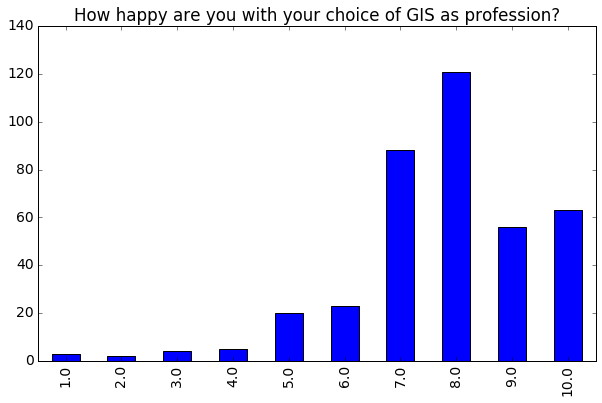

In [27]:
print "How happy are you with your choice of GIS as profession?"

print survey['How happy are you with your choice of GIS as profession?'].describe()

#print "\nCounts:"
var = survey.groupby('How happy are you with your choice of GIS as profession?').size() #.sort_values(ascending=False)
#print var

#print "\nPercentages:"
#var2 = survey.groupby('How happy are you with your choice of GIS as profession?').size() * 100 / len(survey)
#print var2 #.sort_values(ascending=False)

my_plot = var.plot(kind='bar', title="How happy are you with your choice of GIS as profession?")
my_plot.set_xlabel("")
my_plot.set_ylabel("")
my_plot.patch.set_facecolor('None') #or ax.patch.set_visible(False).

How optimistic are you about the future of GIS as a profession?
count    390.000000
mean       7.605128
std        1.932798
min        1.000000
25%        7.000000
50%        8.000000
75%        9.000000
max       10.000000
Name: How optimistic are you about the future of GIS as a profession?, dtype: float64


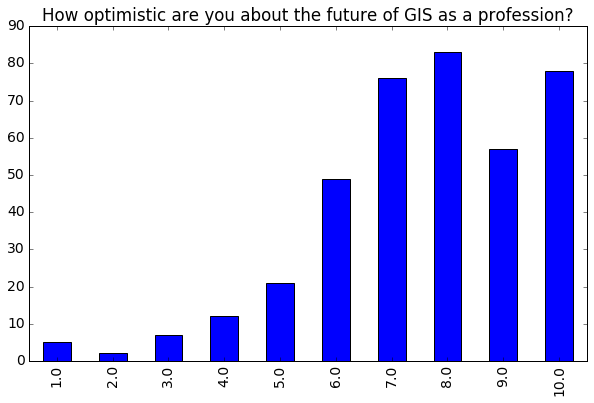

In [28]:
print "How optimistic are you about the future of GIS as a profession?"

print survey['How optimistic are you about the future of GIS as a profession?'].describe()

#print "\nCounts:"
var = survey.groupby('How optimistic are you about the future of GIS as a profession?').size() #.sort_values(ascending=False)
#print var

#print "\nPercentages:"
#var2 = survey.groupby('How optimistic are you about the future of GIS as a profession?').size() * 100 / len(survey)
#print var2 #.sort_values(ascending=False)

my_plot = var.plot(kind='bar', title="How optimistic are you about the future of GIS as a profession?")
my_plot.set_xlabel("")
my_plot.set_ylabel("")
my_plot.patch.set_facecolor('None') #or ax.patch.set_visible(False).

In [29]:
print "What brought you to r/gis?"

print "\nCounts:"
var = survey.groupby('What brought you to r/gis?').size().sort_values(ascending=False)
print var

What brought you to r/gis?

Counts:
What brought you to r/gis?
I've been a redditor for a while                                                                               264
Looking for a like-minded community to talk shop with                                                           87
Looking for help                                                                                                29
Answering questions about Esri                                                                                   2
Interested in what other GIS users do                                                                            1
Done some GIS at university, chose to do more next year, and interested in it                                    1
GIS Professional already using reddit                                                                            1
Here since it was born.                                                                                          1
I started taking 